In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

In [48]:
#df = pd.read_excel('5gene.xlsx')
#ge_original = np.array(df)
ge_original = np.array(new_df)

n = len(ge_original[1])
t = len(ge_original)

In [49]:
A =np.array([ 15,10,10,8,10])
B = np.array([ 10,10,10,10,10])
g = np.array([[ 0,0,1,0,-0.1],
        [2,0,0,0,0],
        [ 0,-0.1,0,0,0 ],
        [0,2,0,0,-1],
        [0,0,0,2,0]])
h= np.array([[2,0,0,0,0],
        [0,2,0,0,0],
        [0,-0.1,2,0,0],
        [ 0,0,0,2,0],
        [ 0,0,0,0,2]])

<h1> Differential Evolutionary Algorithm for Gene Regulatory Network of 5 Genes <h1>
<img src="ssystemequation.png"><img>

In [131]:
def calc_dydt(alpha, beta, g, h, exp ):
    
    #exp is the gene expression of the previous time step
    
    
    #print(alpha,'*',exp[0],'^',g[0],'*',exp[1],'^',g[1],'*',exp[2],'^',g[2],'*',exp[3],'^',g[3],'*',exp[4],'^',g[4])
    
    Generation = alpha * (np.prod(pow(exp,g)))
    Degeneration = beta* (np.prod(pow(exp,h)))
    
    return (Generation-Degeneration)
    
def calc_ge(p):
    #p --> learning parameters as a dictionary 
    
    #t -->is the length of time stamp
    #n --> number of Genes
    #init--> gene expression for time step 1
    
    original = ge_original.copy()
    ge_calc = [original[0]]
    H=0.01 #step size
    ge_spline = [original[0]]
    
    for i in range((t-1)*(5)):
     
    
        #tb = H*i
       #linear spline interpolation
        #ta = tb+2*(H) #only if the data is uniform
        
        #t_now = (i+1)*H #the current time step 
        
        #X_ta = original[i].copy()
        #X_tb = original[i+2].copy()
        
        
        #print(tb,ta,i,i+2)
        
        #X_t = X_tb + (((X_ta-X_tb)/(ta-tb))*(t_now-tb))
        
        #ge_spline.append(X_t)
        
        single_exp=[]
        #original
        #print("original")
        #print(ge_original[i])
        #print("after change---------")
        for j in range(n):
            
            #print(original[i][j])
            
            #ge_temp = ge_spline[i].copy()
            
            #ge_temp = ge_original[i].copy()
            
            ge_temp = ge_calc[i].copy()
            
            #print("for Gene ", j)
            value = ge_calc[i][j].copy()
            #ge_temp[j]=value
            
            #print(ge_temp==ge_original[i])
            
            k1 = calc_dydt(A[j],B[j],g[j],h[j],ge_temp)
            #print(h)
            #print(ge_temp+k1*H*0.5)
            k2 = calc_dydt(A[j],B[j],g[j],h[j],ge_temp+(H*0.5*k1))
            k3 = calc_dydt(A[j],B[j],g[j],h[j],ge_temp+(H*0.5*k2))
            k4 = calc_dydt(A[j],B[j],g[j],h[j],ge_temp+(k3*H))
            next_step = value + ((1/6)*(k1+2*k2+2*k3+k4)*H)
            #next_step = value + (k1*H)

            #rangeKutta Method call
            
            
            
            
            
            single_exp.append(next_step)
            
        ge_calc.append(single_exp)
    
    ge_calc = np.array(ge_calc)
    ge=[]
    for x in range(len(ge_calc)):
        if(x%5==0):
            ge.append(ge_calc[x])
    ge = np.array(ge)
    
    
    return(ge)

In [132]:
ge_calculated = calc_ge(random_population())


In [91]:
#data = ge_calculated.copy()
ts = np.array([(x*0.05) for x in range(20)]) #number of time points
len(ts)

20

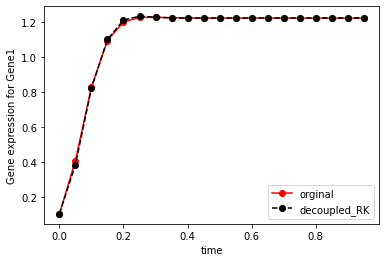

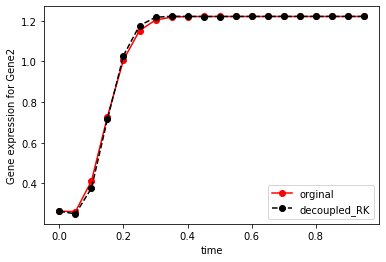

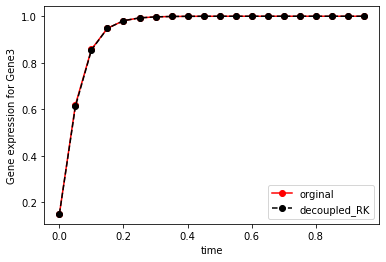

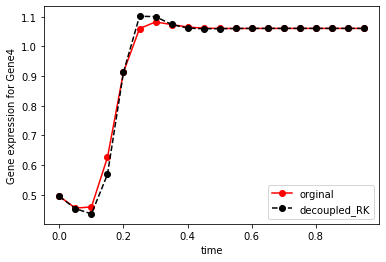

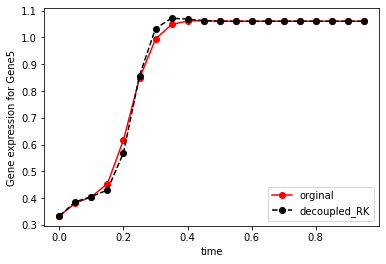

In [133]:
for i in range(5):
    #plt.plot(ts, decoupled_RK[:,i], marker='o', color='black', linestyle='dashed'  )
    plt.plot(ts, ge_original[:,i], marker='o', color='red')
    
    plt.plot(ts, ge_calc[:,i], marker='o', color='black',linestyle='dashed' )
    plt.xlabel('time')
    plt.ylabel('Gene expression for Gene'+str(i+1))
    plt.legend(('orginal',"decoupled_RK"))
    plt.show()
